
# <font color="yellow"> <h3 align="center"> Mobile Phone Price Predictor</h3></font>

# <font color='blue'>Load the dataset </font>

In [157]:
import numpy as np
import pandas as pd

df=pd.read_csv("C:/Users/niman/Desktop/Mobile_Price_Predictor/data/Mobile phone price1.csv");
df


,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,5020,279
4,Google,Pixel 6,128 GB,8 GB,4614,799
...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,4160,349
404,Apple,iPhone 12 Pro Max,128,6,3687,1099
405,Oppo,Reno3,128,8,4025,429



## <font color='blue'> Data Analysis </font>

In [158]:
df.shape


(407, 6)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Battery Capacity (mAh)  407 non-null    int64 
 5   Price ($)               407 non-null    object
dtypes: int64(1), object(5)
memory usage: 19.2+ KB


In [160]:
# Display the first 5 rows of the dataset
df.head()

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,5020,279
4,Google,Pixel 6,128 GB,8 GB,4614,799


In [161]:
df.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000



# <font color='blue' > data preprocessing </font>

### <font color='gree'>dropping the missing values</font>


df = df.dropna()


### <font color='gree'> Check Null Data Values</font>

In [162]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [163]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



### <font color='gree'> Data Type Change</font>

In [164]:
# View Columns
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Battery Capacity (mAh)',
       'Price ($)'],
      dtype='object')

In [165]:
# Change data type and remove 'GB' in the RAM Column and Storage column
df['RAM '] = df['RAM '].str.replace('GB','').astype('int64')
df[ 'Storage '] = df[ 'Storage '].str.replace('GB','').astype('int64')

In [166]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    int64 
 3   RAM                     407 non-null    int64 
 4   Battery Capacity (mAh)  407 non-null    int64 
 5   Price ($)               407 non-null    object
dtypes: int64(3), object(3)
memory usage: 19.2+ KB


In [167]:
# Remove dollar sign and commas
df['Price ($)'] = df['Price ($)'].str.replace('$', '').str.replace(',', '')

# Convert to integer
df['Price ($)'] = df['Price ($)'].astype('int64')



### <font color="gree">Number of Counts </font>

In [168]:
df['Brand'].value_counts()

Brand
Samsung       79
Xiaomi        67
Oppo          56
Realme        43
Vivo          35
Apple         30
Nokia         28
Motorola      23
OnePlus       15
Huawei        12
Google         7
Asus           4
LG             3
Blackberry     3
Sony           1
CAT            1
Name: count, dtype: int64

In [169]:
# Number of different data in Brand column
len(df['Brand'].value_counts())

16

In [170]:
# Different Model types and quantity
df['Model'].value_counts()

Model
Poco X3 Pro           6
Y33s                  5
iPhone XR             5
C21Y                  5
Redmi 10 Prime        5
                     ..
Mi 11 Lite NE         1
Moto G Stylus 2021    1
A54s 5G               1
Galaxy M52            1
Reno3                 1
Name: count, Length: 239, dtype: int64

In [171]:

df['Model'].count()

407

In [172]:
# Different RAM sizes and quantity
df['RAM '].value_counts()

RAM 
4     128
6     107
8      95
3      38
12     25
2      11
5       2
16      1
Name: count, dtype: int64

In [173]:
# Different Battery Capacity  types and quantity
df['Battery Capacity (mAh)'].value_counts()

Battery Capacity (mAh)
5000    159
4500     46
6000     40
4000     34
5020     14
4310     10
4200      8
4300      7
5160      7
4230      6
4250      6
1821      5
2942      5
2815      5
3110      4
3500      4
4950      3
3969      3
4080      3
2227      3
5050      3
7000      2
4820      2
3300      2
4600      2
4630      2
2691      1
4510      1
3174      1
4800      1
3095      1
3340      1
4115      1
4850      1
4160      1
3687      1
2800      1
3000      1
3885      1
4350      1
4400      1
4100      1
4470      1
4450      1
4352      1
4520      1
4614      1
4025      1
Name: count, dtype: int64

In [174]:
# Different Battery Capacity  types and quantity
df['Storage '].value_counts()

Storage 
128    250
64      83
256     40
32      31
512      3
Name: count, dtype: int64

### <font color="gree">Model  Column </font>

In [175]:
# retrieve the unique values in the 'Model' column 
df['Model'].unique()

array(['iPhone 13 Pro', 'Galaxy S21 Ultra', '9 Pro', 'Redmi Note 10 Pro',
       'Pixel 6', 'iPhone 13', 'Galaxy Z Flip3', 'Poco X3 Pro',
       'Reno6 Pro+ 5G', 'X70 Pro+', 'Nord CE 5G', 'Galaxy A52s 5G',
       'GT Neo2', 'iPhone 12 Mini', 'Find X3 Pro', 'Mi 11 Lite 5G NE',
       'Galaxy S21', 'Y20s (G)', '8s 5G', 'A94', 'Redmi 10 Prime',
       'Galaxy A22 5G', 'Narzo 50 Pro 5G', '9', 'Redmi Note 10 Pro Max',
       'iPhone 11', 'Galaxy A03s', 'A74 5G', 'Y12s (2021)', '9i',
       'Galaxy M52 5G', 'Redmi 10', 'iPhone SE (2nd Gen)', 'A53s', 'Y33s',
       'C25s', 'Galaxy A22 4G', 'Nord 2 5G', 'Poco M3 Pro 5G',
       'iPhone XR', 'A16', 'C21Y', 'Galaxy F22', 'F19 Pro+ 5G', 'Mi 11X',
       'V21e', '8 5G', 'Galaxy M12', 'A16s', 'Redmi 9 Power',
       'iPhone 11 Pro Max', 'Y20G', 'Narzo 50i', 'A54', 'Redmi 9T',
       'iPhone 13 Pro Max', 'Y33', 'Galaxy A72', 'Reno6 Pro 5G',
       'iPhone SE (2020)', 'Y53s', '7i', 'Galaxy A52 5G', 'F19 Pro',
       'Redmi Note 10S', 'Y21s', 'Mi 11 L

In [176]:
# This part applies a function to each element of takes the first word
df['Model_name'] = df['Model'].apply(lambda x:" ".join(x.split()[0:1]))


In [177]:
# Different Model_name new  types and quantity
df['Model_name'].value_counts()

Model_name
Galaxy    79
Redmi     38
iPhone    30
Moto      21
Poco      15
          ..
A15        1
G10        1
C25        1
X20        1
Reno3      1
Name: count, Length: 93, dtype: int64

In [178]:
# Get the value counts of the 'Model' column
model_counts = df['Model_name'].value_counts()

# Initialize a new list to store the updated values
new_models = []

# Iterate over each model
for model in df['Model_name']:
    # Check if the count of the model is less than 5
    if model_counts[model] <=5:
        # If so, append 'other' to the new list
        new_models.append('other')
    else:
        # Otherwise, append the original model value
        new_models.append(model)


# Assign the new list of models back to the DataFrame
df['Model_name'] = new_models


In [179]:
df['Model_name'].value_counts()

Model_name
other     185
Galaxy     79
Redmi      38
iPhone     30
Moto       21
Poco       15
Mi         14
Narzo      12
Pixel       7
Nord        6
Name: count, dtype: int64

### <font color="gree">Brand Column </font>

In [180]:
# Remove 6 company types and these add to 'Other' company type
def add_company(inpt):
    if inpt == 'Google' or inpt == 'Asus' or inpt == 'LG' or inpt == 'Blackberry'or inpt == 'Sony'or inpt == 'CAT':
        return 'Other'
    else:
        return inpt

In [181]:
df['Brand'] = df['Brand'].apply(add_company)

In [182]:
len(df['Brand'].value_counts())

11


### <font color="gree"> battery_capacity column </font>

In [183]:
# This function sets the processor based on the battery capacity of a device,
# ensuring that the processor is set to a specific value depending on the
# battery capacity range provided.

def set_processor( battery_capacity):
    if battery_capacity >= 7000:
        return 7000
    elif battery_capacity >= 6000:
        return 6000
    elif battery_capacity >= 5000:
        return 5000
    elif battery_capacity >= 4000:
        return 4000
    elif battery_capacity >= 3000:
        return 3000
    else:
        return 2000

                       
               

In [184]:
df['Battery Capacity (mAh)'] = df['Battery Capacity (mAh)'].apply(set_processor)

In [185]:

df['Battery Capacity (mAh)'].value_counts()

Battery Capacity (mAh)
5000    183
4000    143
6000     40
2000     20
3000     19
7000      2
Name: count, dtype: int64

In [186]:
# This function sets the processor level based on the specific battery capacity provided,
# mapping each battery capacity to a corresponding processor level.


def set_processor( battery_capacity):
    if battery_capacity ==7000:
        return 5
    elif battery_capacity == 6000:
        return 4
    elif battery_capacity == 5000:
        return 3
    elif battery_capacity == 4000:
        return 2
    elif battery_capacity == 3000:
        return 1
    else:
        return 0

In [187]:
df['Battery Capacity (mAh)'] = df['Battery Capacity (mAh)'].apply(set_processor)

In [188]:
df['Battery Capacity (mAh)'].value_counts()

Battery Capacity (mAh)
3    183
2    143
4     40
0     20
1     19
5      2
Name: count, dtype: int64

### <font color="gree">Storage Column </font>

In [189]:
# This function sets the storage level based on the RAM capacity provided,
# mapping each RAM capacity to a corresponding storage level.


def set_processor_storage( ram):
    if ram ==512:
        return 4
    elif ram == 256:
        return 3
    elif ram == 128:
        return 2
    elif ram == 64:
        return 1
    else:
        return 0
    

In [190]:
df['Storage '] = df['Storage '].apply(set_processor_storage)

In [191]:
#Storage 
df['Storage '].value_counts()

Storage 
2    250
1     83
3     40
0     31
4      3
Name: count, dtype: int64

In [192]:
df.head()

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),Model_name
0,Apple,iPhone 13 Pro,2,6,1,999,iPhone
1,Samsung,Galaxy S21 Ultra,3,12,3,1199,Galaxy
2,OnePlus,9 Pro,2,8,2,899,other
3,Xiaomi,Redmi Note 10 Pro,2,6,3,279,Redmi
4,Other,Pixel 6,2,8,2,799,Pixel


In [193]:
df.shape

(407, 7)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    int64 
 3   RAM                     407 non-null    int64 
 4   Battery Capacity (mAh)  407 non-null    int64 
 5   Price ($)               407 non-null    int64 
 6   Model_name              407 non-null    object
dtypes: int64(4), object(3)
memory usage: 22.4+ KB


In [195]:
df.describe()

,Storage,RAM,Battery Capacity (mAh),Price ($)
count,407.000000,407.000000,407.000000,407.000000
mean,1.756757,5.837838,2.515971,408.314496
std,0.760669,2.431980,0.930658,299.684768
min,0.000000,2.000000,0.000000,99.000000
25%,1.000000,4.000000,2.000000,199.000000
50%,2.000000,6.000000,3.000000,299.000000
75%,2.000000,8.000000,3.000000,499.000000
max,4.000000,16.000000,5.000000,1999.000000


### <font color="gree"> Encoding categorical variables</font>

In [196]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [197]:
from sklearn.preprocessing import LabelEncoder

#Encoded Brand Column
#Encoded Model column
lb_Brand=LabelEncoder()
lb_Models=LabelEncoder()


In [198]:

# the transformed labels of the 'Brand' column using the fitted LabelEncoder 'lb_Brand'.

df['Brand_T'] = lb_Brand.fit_transform(df['Brand'])

In [199]:
df.head()

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),Model_name,Brand_T
0,Apple,iPhone 13 Pro,2,6,1,999,iPhone,0
1,Samsung,Galaxy S21 Ultra,3,12,3,1199,Galaxy,8
2,OnePlus,9 Pro,2,8,2,899,other,4
3,Xiaomi,Redmi Note 10 Pro,2,6,3,279,Redmi,10
4,Other,Pixel 6,2,8,2,799,Pixel,6


In [200]:
# Add New column Model Name
df['Model_T'] = lb_Models.fit_transform(df['Model_name'])

In [201]:
df.head()

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),Model_name,Brand_T,Model_T
0,Apple,iPhone 13 Pro,2,6,1,999,iPhone,0,8
1,Samsung,Galaxy S21 Ultra,3,12,3,1199,Galaxy,8,0
2,OnePlus,9 Pro,2,8,2,899,other,4,9
3,Xiaomi,Redmi Note 10 Pro,2,6,3,279,Redmi,10,7
4,Other,Pixel 6,2,8,2,799,Pixel,6,5


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    int64 
 3   RAM                     407 non-null    int64 
 4   Battery Capacity (mAh)  407 non-null    int64 
 5   Price ($)               407 non-null    int64 
 6   Model_name              407 non-null    object
 7   Brand_T                 407 non-null    int32 
 8   Model_T                 407 non-null    int32 
dtypes: int32(2), int64(4), object(3)
memory usage: 25.6+ KB


In [203]:
df.describe()

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_T,Model_T
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,1.756757,5.837838,2.515971,408.314496,6.176904,5.926290
std,0.760669,2.431980,0.930658,299.684768,3.079114,3.677179
min,0.000000,2.000000,0.000000,99.000000,0.000000,0.000000
25%,1.000000,4.000000,2.000000,199.000000,4.000000,2.000000
50%,2.000000,6.000000,3.000000,299.000000,7.000000,8.000000
75%,2.000000,8.000000,3.000000,499.000000,8.500000,9.000000
max,4.000000,16.000000,5.000000,1999.000000,10.000000,9.000000


In [204]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Battery Capacity (mAh)',
       'Price ($)', 'Model_name', 'Brand_T', 'Model_T'],
      dtype='object')


# <font color="blue">Data Visualization</font>

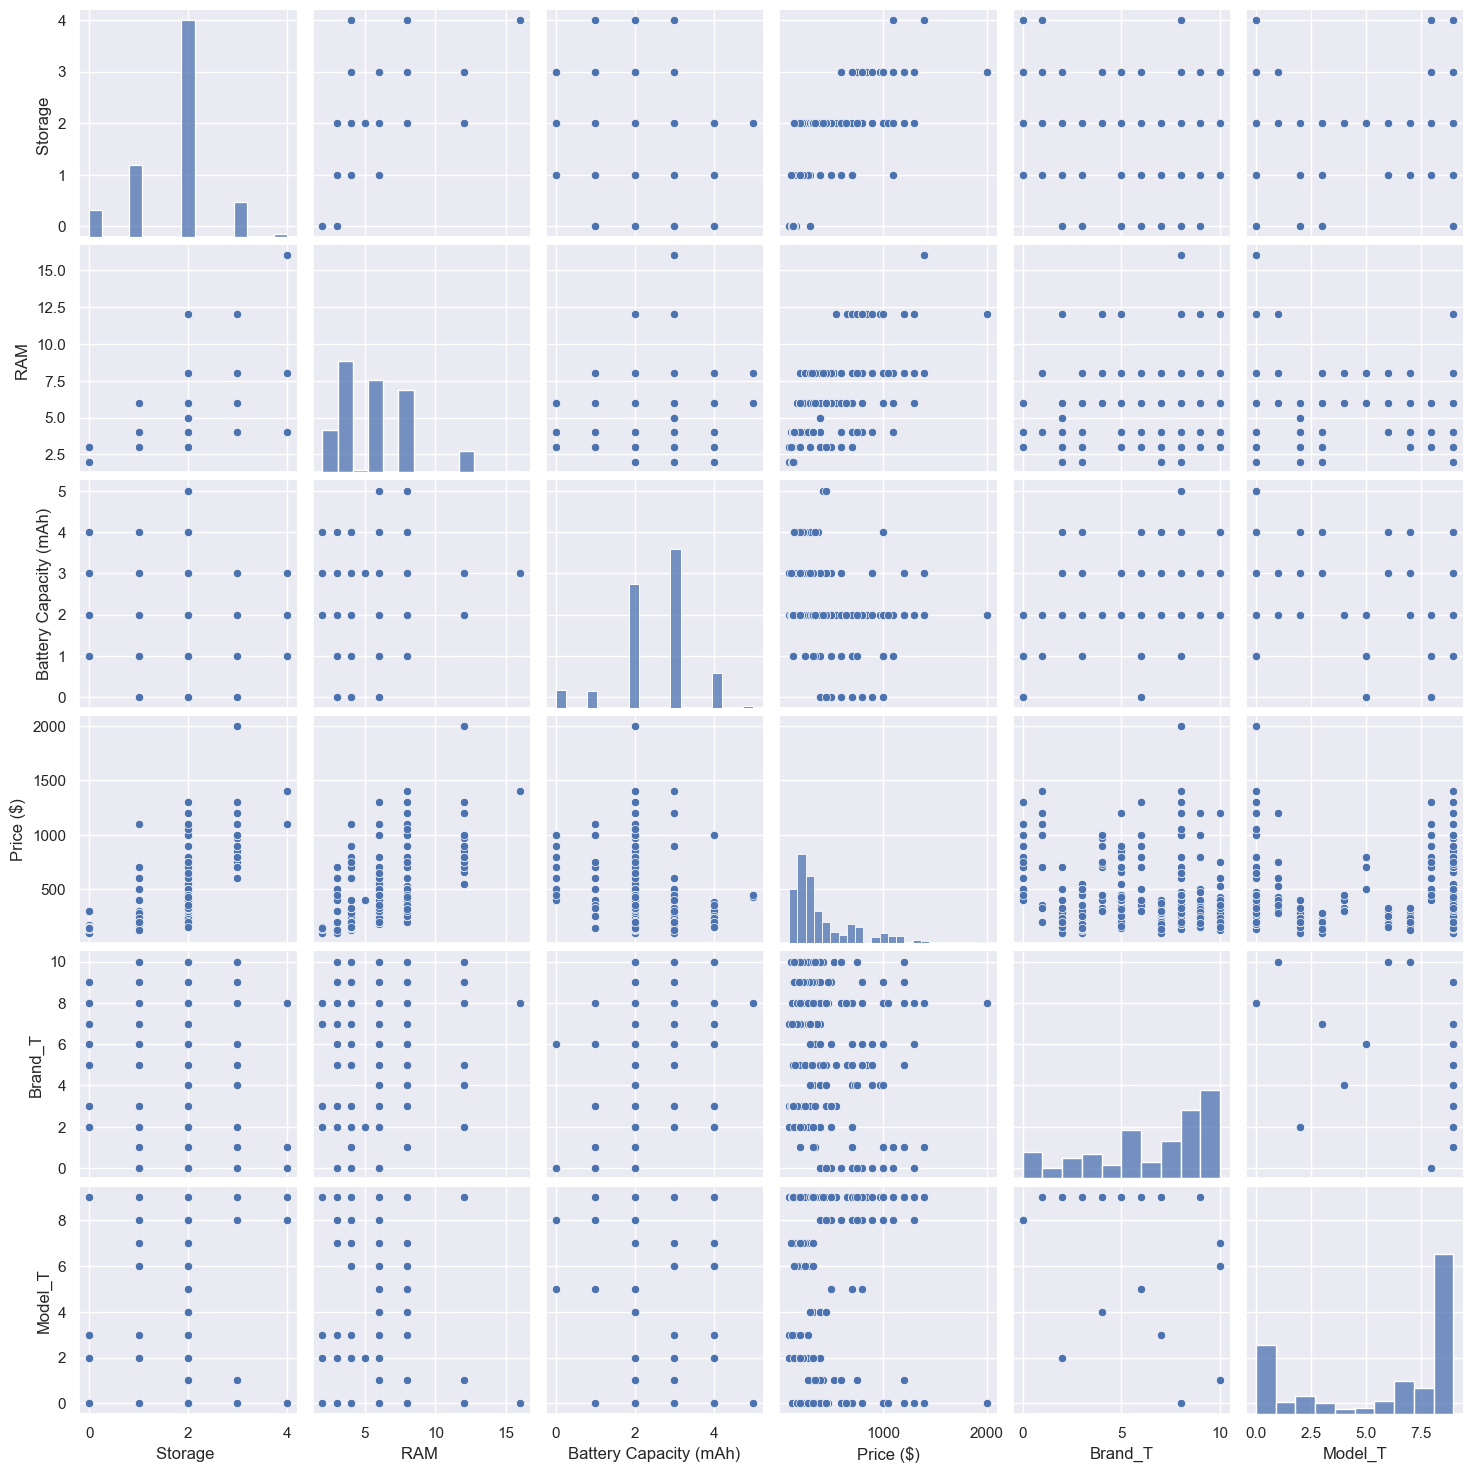

In [205]:
# This code generates a pair plot using Seaborn, which visualizes pairwise relationships
#  displaying scatterplots for numerical variables
# and histograms for each variable along the diagonal.
# seaborn for visualization
import seaborn as sns

sns.pairplot(df)


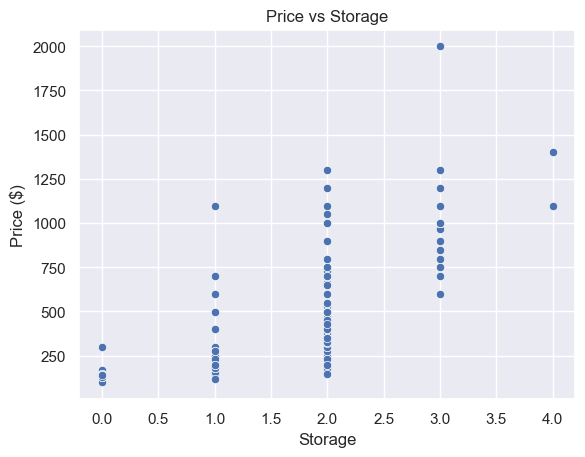

In [206]:
# creates a scatter plot using Seaborn to visualize the relationship between
# the 'Storage' and 'Price ($)' columns from the DataFrame 'df', with custom labels and title.



import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



# Create a scatter plot using Seaborn
sns.scatterplot( x=df['Storage '],y=df['Price ($)'])
plt.ylabel('Price ($)')
plt.xlabel('Storage')
plt.title('Price vs Storage')
plt.show()



### <font color="gree">Brands Distribution</font>

C:\Users\niman\AppData\Local\Temp\ipykernel_1556\2796424107.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="Brand",data=df,kind="count",palette="Purples_r", height=6, aspect=2,order = df['Brand'].value_counts().index)


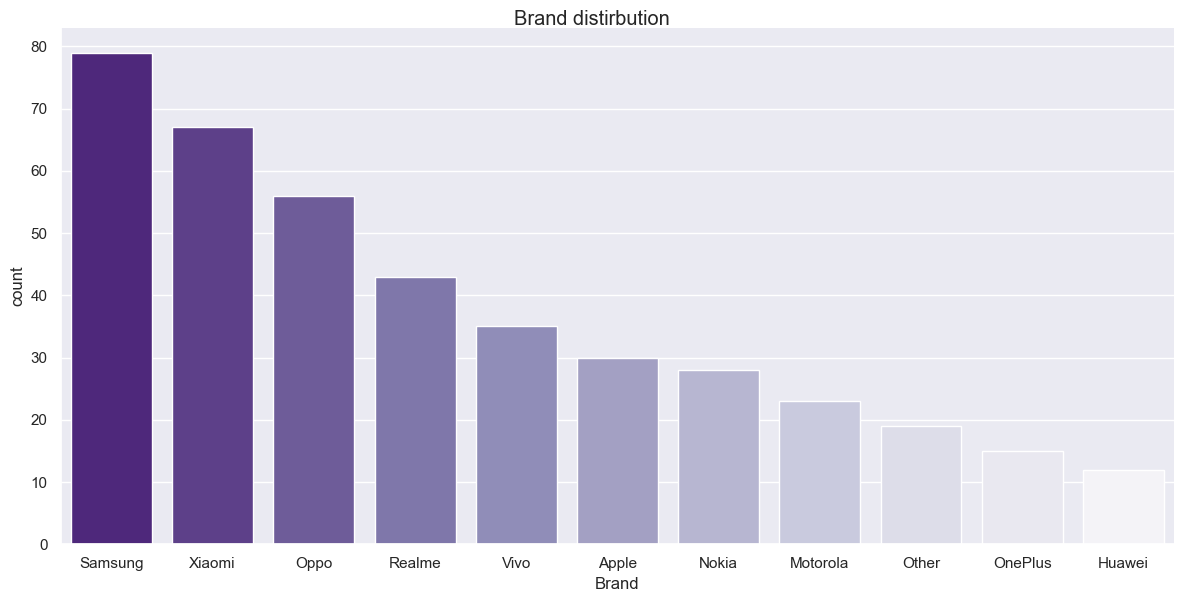

In [207]:
# creates a categorical plot (count plot) using Seaborn to visualize the distribution
# of the 'Brand' column in the DataFrame 'df', with a custom palette, height, aspect, and order of categories,
# along with a title positioned at the top of the figure.


g = sns.catplot(x="Brand",data=df,kind="count",palette="Purples_r", height=6, aspect=2,order = df['Brand'].value_counts().index)
g.fig.suptitle("Brand distirbution",y=1)
plt.show()


### <font color="gree">total price by brand</font>

C:\Users\niman\AppData\Local\Temp\ipykernel_1556\3641407652.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_prices_sorted, x='Brand', y='Price ($)', palette="Purples_r" )


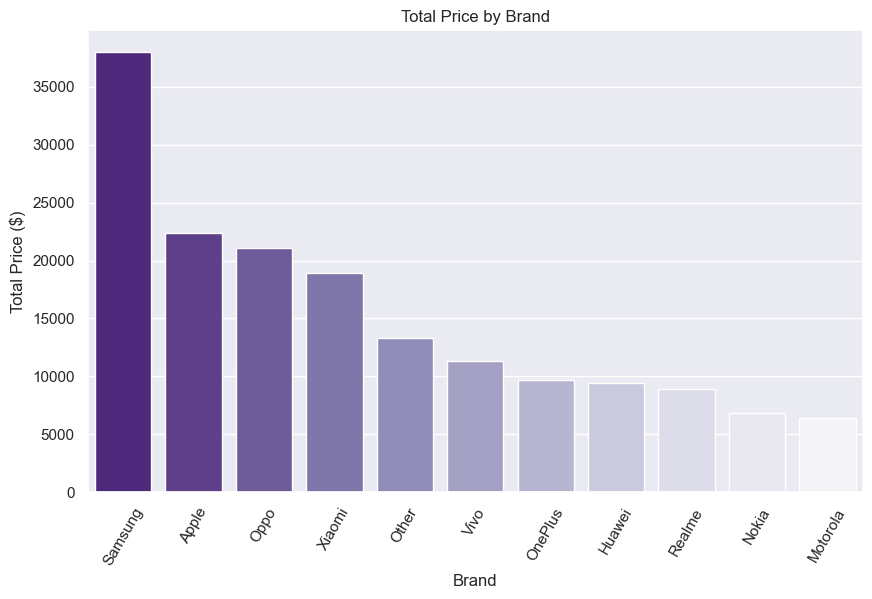

In [208]:
# calculates the total price of products for each brand 
# then creates a horizontal bar plot using Seaborn to visualize the total price by brand, with brands sorted by total price in descending order.



brand_prices = df.groupby('Brand')['Price ($)'].sum().reset_index()
brand_prices_sorted = brand_prices.sort_values(by='Price ($)', ascending=False)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_prices_sorted, x='Brand', y='Price ($)', palette="Purples_r" )

plt.title("Total Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Total Price ($)")
plt.xticks(rotation=60, ha='center')
plt.show()

### <font color="gree">Drop unnecessary columns</font>

In [209]:
# Drop Brand Column and Model Column
df = df.drop(columns=['Brand'])
df = df.drop(columns=['Model'])
df = df.drop(columns=['Model_name'])

In [210]:
df

,Storage,RAM,Battery Capacity (mAh),Price ($),Brand_T,Model_T
0,2,6,1,999,0,8
1,3,12,3,1199,8,0
2,2,8,2,899,4,9
3,2,6,3,279,10,7
4,2,8,2,799,6,5
...,...,...,...,...,...,...
402,2,8,2,1049,8,0
403,2,6,2,349,10,1
404,2,6,1,1099,0,8
405,2,8,2,429,5,9


# <font color="blue">Feature scaling </font>

## <font color="gree">Min-max-Scaling </font>

In [211]:
#   applies it to scale the numerical features
# range between 0 and 1. It creates a new DataFrame 'df_pred_mmax' to store the scaled data,



from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_pred_mmax = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the first 5 rows of the preprocessed dataset
print(df_pred_mmax.head())

   Storage       RAM   Battery Capacity (mAh)  Price ($)  Brand_T   Model_T
0      0.50  0.285714                     0.2   0.473684      0.0  0.888889
1      0.75  0.714286                     0.6   0.578947      0.8  0.000000
2      0.50  0.428571                     0.4   0.421053      0.4  1.000000
3      0.50  0.285714                     0.6   0.094737      1.0  0.777778
4      0.50  0.428571                     0.4   0.368421      0.6  0.555556


##  <font color="gree">Standard scaling </font>

In [212]:
#  then applies it to standardize (mean=0, variance=1) the numerical features
# in the DataFrame 'df'. It creates a new DataFrame 'df_pred_sc' to store the standardized data,


from sklearn.preprocessing import StandardScaler
import pandas as pd  # Don't forget to import pandas if it's not imported already

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_pred_sc = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the first 5 rows of the preprocessed dataset
print(df_pred_sc.head())



   Storage       RAM   Battery Capacity (mAh)  Price ($)   Brand_T   Model_T
0  0.320169  0.066761               -1.630929   1.973449 -2.008534  0.564635
1  1.636418  2.536923                0.520734   2.641638  0.592813 -1.613624
2  0.320169  0.890149               -0.555097   1.639354 -0.707861  0.836917
3  0.320169  0.066761                0.520734  -0.432033  1.243150  0.292352
4  0.320169  0.890149               -0.555097   1.305259 -0.057524 -0.252212


# <font color="blue">Model Building and Selection</font>

In [213]:

# all columns except 'Price ($)' (features), and Y contains only the 'Price ($)' column (target variable).

X = df.drop('Price ($)', axis=1)
Y = df['Price ($)']

In [214]:
X

,Storage,RAM,Battery Capacity (mAh),Brand_T,Model_T
0,2,6,1,0,8
1,3,12,3,8,0
2,2,8,2,4,9
3,2,6,3,10,7
4,2,8,2,6,5
...,...,...,...,...,...
402,2,8,2,8,0
403,2,6,2,10,1
404,2,6,1,0,8
405,2,8,2,5,9


In [215]:
Y

0       999
1      1199
2       899
3       279
4       799
       ... 
402    1049
403     349
404    1099
405     429
406     649
Name: Price ($), Length: 407, dtype: int64

## <font color="gree">Divide dataset into training and testing set</font>

In [216]:

#  It assigns 80% of the data to the training set (x_train, y_train)
# and 20% to the testing set (x_test, y_test), with a specified random state for reproducibility.


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [217]:

x_train.shape

(325, 5)

In [218]:
y_train.shape

(325,)

In [219]:
x_test.shape

(82, 5)

In [220]:
y_test.shape

(82,)

In [221]:
x_test

,Storage,RAM,Battery Capacity (mAh),Brand_T,Model_T
70,2,4,4,7,9
218,1,4,3,10,7
258,2,8,4,8,0
33,2,6,3,5,9
42,1,4,4,8,0
...,...,...,...,...,...
90,1,4,1,6,9
379,2,3,0,0,8
341,2,8,3,5,9
376,3,8,2,1,9


In [222]:
y_test

70     169
218    139
258    349
33     259
42     189
      ... 
90     399
379    449
341    399
376    999
357    399
Name: Price ($), Length: 82, dtype: int64

# <font color="blue">Model training </font>

In [223]:

# (x_train, y_train) and then calculating its accuracy score using the testing data (x_test, y_test).
# It prints the model name and its corresponding accuracy score.



def model_acc(model):
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

# <font color="gree">regression_metrics</font>

In [224]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(y_test, y_predict):
   
   
    
    # Mean Absolute Error (MAE)
    MAE = mean_absolute_error(y_test, y_pred)
    
    # Mean Squared Error (MSE)
    MSE= mean_squared_error(y_test, y_pred)
    
    # Root Mean Squared Error (RMSE)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    
    # R-squared (R2)
    R2 = r2_score(y_test, y_pred)
    
    # Mean Absolute Percentage Error (MAPE)
    MAPE = 100 * np.mean(np.abs((y_test - y_pred) / y_test))
    
    



    print(f':\n\tMean Absolute Error (MAE) = {MAE}\n\tMean Squared Error (MSE) = {MSE}\n\tRoot Mean Squared Error (RMSE)= {RMSE}\n\tR-squared (R2) = {R2}\n\tMean Absolute Percentage Error (MAPE) = {MAPE}')
    


# <font color="gree">Best Fit Line</font>

In [225]:
# calculates various regression evaluation metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE),
# Root Mean Squared Error (RMSE), R-squared (R2), and Mean Absolute Percentage Error (MAPE), and prints their values.




import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def plot_best_fit_line(y_test, y_predicted):
   
    # Calculate the R-squared value
    r2 = r2_score(y_test, y_pred)
    
    # Plot true vs. predicted values
    plt.scatter(y_test, y_pred, color='blue', label='True vs. Predicted')
    
    # Plot the best-fit line
    min_val = min(min(y_test), min(y_pred))
    max_val = max(max(y_test), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='Best Fit Line')
    
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Best Fit Line (R-squared = {r2:.2f})')
    plt.legend()
    plt.grid(True)
    plt.show()






# <font color="red">LinearRegression Algorithm</font>

In [226]:
# Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

LinearRegression() --> 0.6849471710519697


:
	Mean Absolute Error (MAE) = 134.67131524688213
	Mean Squared Error (MSE) = 28790.74948693
	Root Mean Squared Error (RMSE)= 169.67837071038252
	R-squared (R2) = 0.6849471710519697
	Mean Absolute Percentage Error (MAPE) = 37.770619290620324


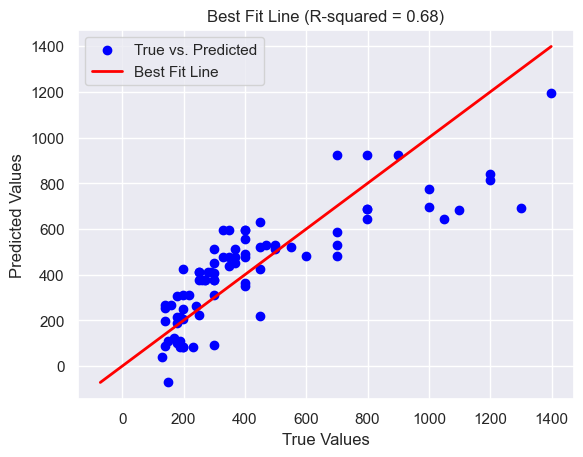

array([  99.67919   ,   56.79360064, -102.79377838,  -20.15749877,
        -12.06195243])

In [227]:

y_pred=lr.predict(x_test)
regression_metrics(y_test, y_pred)

plot_best_fit_line(y_test, y_pred)

#cofficient value(m values)
xy=lr.coef_
xy




In [228]:
# intercept value(Q0)
z=lr.intercept_
z

356.0393049388099

# <font color="red">Lasso  Algorithm</font>

In [229]:
from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

Lasso() --> 0.6840162045795657


:
	Mean Absolute Error (MAE) = 134.6112884221566
	Mean Squared Error (MSE) = 28875.824814065472
	Root Mean Squared Error (RMSE)= 169.9288816360111
	R-squared (R2) = 0.6840162045795657
	Mean Absolute Percentage Error (MAPE) = 37.65939661175258


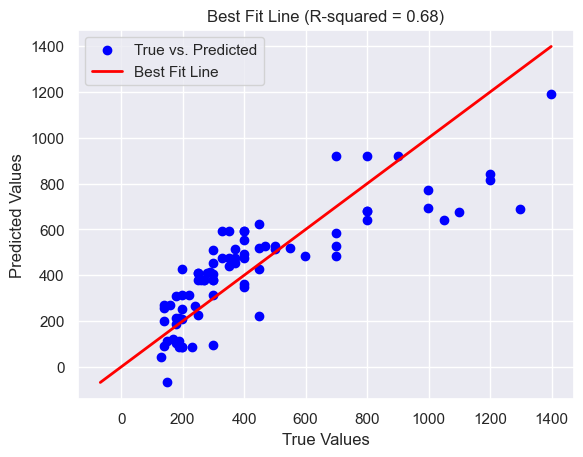

In [230]:
# lasso algorithm using
y_pred=lasso.predict(x_test)
regression_metrics(y_test, y_pred)
plot_best_fit_line(y_test, y_pred)

# <font color="red">DecisionTreeRegressor Algorithm</font>

In [231]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

DecisionTreeRegressor() --> 0.6699230030312484


:
	Mean Absolute Error (MAE) = 87.0030487804878
	Mean Squared Error (MSE) = 30163.716234057607
	Root Mean Squared Error (RMSE)= 173.67704578918196
	R-squared (R2) = 0.6699230030312484
	Mean Absolute Percentage Error (MAPE) = 19.57572810671025


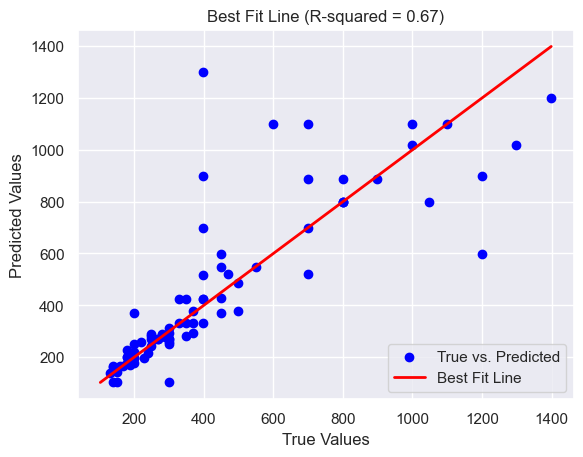

In [232]:
# Decision TreeRegresso  algorithm using
y_pred=dt.predict(x_test)
regression_metrics(y_test, y_pred)
plot_best_fit_line(y_test, y_pred)

# <font color="red">RandomForestRegressor Algorithm</font>

In [233]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

RandomForestRegressor() --> 0.8210879780013018


:
	Mean Absolute Error (MAE) = 73.83049823098237
	Mean Squared Error (MSE) = 16349.674506221665
	Root Mean Squared Error (RMSE)= 127.8658457377171
	R-squared (R2) = 0.8210879780013018
	Mean Absolute Percentage Error (MAPE) = 16.683650594479467


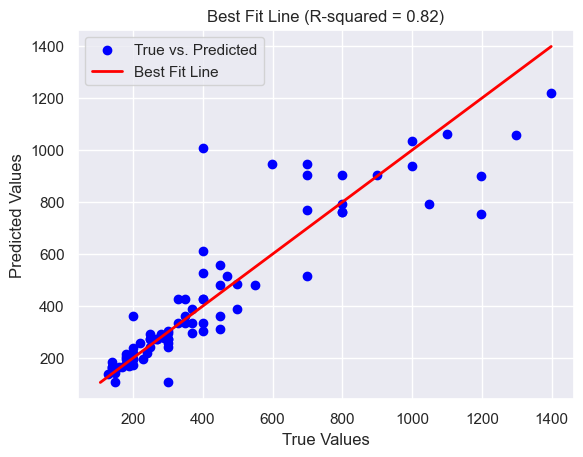

In [234]:
# RandomForestRegressor using
y_pred=rf.predict(x_test)
regression_metrics(y_test, y_pred)
plot_best_fit_line(y_test, y_pred)

In [235]:
## RandomForestRegressor using y_test value predict

In [236]:
y_predit=rf.predict(x_test)
y_pred_df=pd.DataFrame(y_predit,columns=["Predicteed price"])
result = pd.concat([y_test.reset_index(drop=True),y_pred_df],axis=1)

# Display The combined DataFrame
print("Combined DataFrame:")
display(result)

Combined DataFrame:


,Price ($),Predicteed price
0,169,165.093961
1,139,164.288131
2,349,362.008516
3,259,273.514015
4,189,169.768571
...,...,...
77,399,305.415000
78,449,559.364613
79,399,609.897070
80,999,1033.956205


# <font color="blue"> Hyperparameter tunning </font>
### Find Best Model

In [237]:
# using Randomforsement model find best fit model

In [238]:
# This code performs hyperparameter tuning using GridSearchCV to find the best combination of parameters

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 120],
              'criterion':['squared_error','absolute_error','poisson']}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(x_train, y_train)

best_model = grid_fit.best_estimator_



In [239]:
# using Descisiontree regressor model find best model

In [240]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
parameters = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter tuning using GridSearchCV
grid_obj = GridSearchCV(estimator=dt, param_grid=parameters)
grid_fit = grid_obj.fit(x_train, y_train)
dt_best_model = grid_fit.best_estimator_


In [241]:
#Linear  Model find best model

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


# Perform cross-validation to find the best model
scores = cross_val_score(lr, x_train, y_train, cv=5)  # You can adjust the number of folds in cv
average_score = scores.mean()

# Fit the model on the entire training set (this step is not necessary for LinearRegression)
lr.fit(x_train, y_train)

# Since LinearRegression doesn't have hyperparameters to tune, you can directly use lr for predictions.
lr.score(x_test, y_test)

0.6849471710519697

In [243]:
# lasso model

In [244]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
parameters = {
    'alpha': [0.1, 1.0, 10.0]
}

# Perform hyperparameter tuning using GridSearchCV
grid_obj = GridSearchCV(estimator=lasso, param_grid=parameters)
grid_fit = grid_obj.fit(x_train, y_train)
lasso_best_model = grid_fit.best_estimator_


In [245]:
# After Hyperparameter tunning model(Randomforcement model) accuracy is increase
best_model.score(x_test, y_test)


0.8361021685705484

In [246]:
dt_best_model.score(x_test, y_test)

0.7894155670749767

In [250]:
lasso_best_model.score(x_test, y_test)

0.6848588582997321

### After Hyperparameter tunning

In [ ]:
# Best model is Randomforcement model

In [247]:
predit_value=best_model.predict([[2,4,4,7,8]])
predit_value

C:\Users\niman\Desktop\Mobile_Price_Predictor\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([176.09619709])

In [248]:
predit_value=best_model.predict([[3,5,4,7,8]])
predit_value

C:\Users\niman\Desktop\Mobile_Price_Predictor\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([844.72757937])

# <font color="blue"> Save model </font>

In [249]:
import pickle
with open('predictor1.pickle1', 'wb') as file:
pickle.dump(best_model, file)